In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Tensorboard demo using handwritten digits classification using neural network

-------------------------------------
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

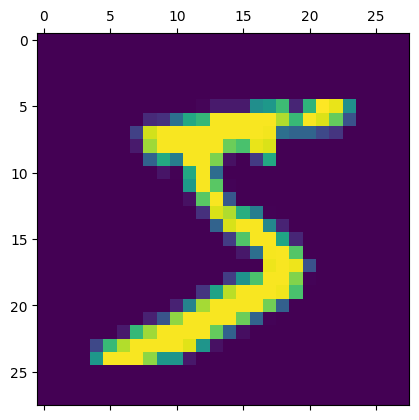

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
#Scaling
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [13]:
X_train_flattened.shape

(60000, 784)


Using Flatten layer so that we don't have to call .reshape on input dataset

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),           #Falttening the input layer
    keras.layers.Dense(100,activation='relu'),           #Hidden Layer
    keras.layers.Dense(10,activation='sigmoid')          #Input Layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="log/",histogram_freq=1)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2779 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1268 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0880 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0527 - accuracy: 0.9836


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it, tensorboard --logdir logs/ This will launch tensorboard at this url which you can open in your browser http://localhost:6006/

In [18]:
model.get_weights()

[array([[ 0.02640755,  0.06252283, -0.06346636, ...,  0.01556467,
         -0.04363753,  0.00831893],
        [ 0.04822996,  0.07337007,  0.00102489, ...,  0.07164694,
         -0.04088199,  0.01679396],
        [-0.0032496 ,  0.01975736,  0.00371459, ..., -0.00410097,
          0.02826495,  0.02596609],
        ...,
        [-0.04257638,  0.06359164, -0.012564  , ...,  0.06372215,
         -0.03688537, -0.05501001],
        [-0.04037809,  0.02305591,  0.00945134, ...,  0.03917231,
          0.06950282, -0.08085403],
        [-0.0758087 , -0.06993069, -0.03073961, ...,  0.02026163,
         -0.08236828, -0.03407481]], dtype=float32),
 array([-0.09678557, -0.02089222,  0.13392644, -0.02536225, -0.07484329,
         0.00254556,  0.0057795 ,  0.10448407, -0.07548048,  0.18727922,
        -0.08108545,  0.15641207,  0.03049844, -0.10697704,  0.01547089,
         0.01489901, -0.15191099,  0.06620393, -0.02131674,  0.09942143,
         0.10337605,  0.14031701, -0.06341691,  0.13520792,  0.037